## Data Cleanup

In [45]:
#import pandas
import pandas as pd
#import numpy
import numpy as np
#import csv module
import csv
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
from pathlib import Path
from sklearn.linear_model import LinearRegression

In [31]:
# Read housing pricing data data
csv_path = r"C:\Users\ektac\Housing-Prices-Machine-Learning-Project\housing_prices_data.csv"
#file_path = Path("C:\Users\ektac\Housing-Prices-Machine-Learning-Project\housing_prices_data.csv")
df_housingprices = pd.read_csv(csv_path)

# Display sample data
df_housingprices

#df_housingprices.County(unique)

,RegionID,Neighborhood,State,City,Metro,County,2020-01-31,2020-02-29,2020-03-31,2020-04-30,...,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,BedroomCount
0,118208,South Los Angeles,CA,Los Angeles,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,350403.0,354217.0,357681.0,360467.0,...,485481.0,486580.0,486336.0,486796.0,486585.0,487578.0,486809.0,489862.0,489152.0,1
1,268496,Southeast Los Angeles,CA,Los Angeles,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,312659.0,314476.0,315822.0,317131.0,...,410623.0,413743.0,416449.0,419431.0,420848.0,422551.0,422515.0,427628.0,430679.0,1
2,273565,East San Jose,CA,San Jose,"San Jose-Sunnyvale-Santa Clara, CA",Santa Clara County,394852.0,397467.0,399616.0,400423.0,...,465598.0,465629.0,463605.0,460273.0,456309.0,452782.0,449427.0,451437.0,454010.0,1
3,273088,Bullard,CA,Fresno,"Fresno, CA",Fresno County,99098.0,103441.0,107280.0,111859.0,...,154223.0,156623.0,158448.0,159079.0,159166.0,158239.0,157523.0,162523.0,167592.0,1
4,276652,West San Jose,CA,San Jose,"San Jose-Sunnyvale-Santa Clara, CA",Santa Clara County,488197.0,492374.0,495291.0,494556.0,...,552316.0,550898.0,546854.0,542083.0,538433.0,536506.0,535151.0,551396.0,573673.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5735,416964,Palo del Amo,CA,Torrance,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,1138242.0,1138178.0,1136606.0,1136593.0,...,1525938.0,1528816.0,1525721.0,1520867.0,1520738.0,1524223.0,1526842.0,1517614.0,1500845.0,5
5736,816654,Wisteria Place,CA,Elk Grove,"Sacramento-Roseville-Folsom, CA",Sacramento County,707131.0,710201.0,713802.0,716662.0,...,856650.0,856203.0,850268.0,841650.0,834761.0,830254.0,826125.0,821199.0,818076.0,5
5737,268594,Wildhorse,CA,Davis,"Sacramento-Roseville-Folsom, CA",Yolo County,986360.0,987999.0,991627.0,995864.0,...,1177278.0,1180328.0,1181081.0,1178730.0,1177077.0,1176723.0,1174847.0,1163805.0,1153217.0,5
5738,810981,Suburbia Park,CA,Huntington Beach,"Los Angeles-Long Beach-Anaheim, CA",Orange County,1087736.0,1086501.0,1086728.0,1088662.0,...,1392844.0,1401822.0,1403423.0,1403561.0,1407924.0,1413183.0,1415136.0,1403629.0,1391961.0,5


In [42]:
county_list = ['Santa Clara County', 'San Diego County']
grouped_df1 = df_housingprices[df_housingprices['County'].isin(['Santa Clara County'])]
grouped_df1

,RegionID,Neighborhood,State,City,Metro,County,2020-01-31,2020-02-29,2020-03-31,2020-04-30,...,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,BedroomCount
2,273565,East San Jose,CA,San Jose,"San Jose-Sunnyvale-Santa Clara, CA",Santa Clara County,394852.0,397467.0,399616.0,400423.0,...,465598.0,465629.0,463605.0,460273.0,456309.0,452782.0,449427.0,451437.0,454010.0,1
4,276652,West San Jose,CA,San Jose,"San Jose-Sunnyvale-Santa Clara, CA",Santa Clara County,488197.0,492374.0,495291.0,494556.0,...,552316.0,550898.0,546854.0,542083.0,538433.0,536506.0,535151.0,551396.0,573673.0,1
5,276215,Blossom Valley,CA,San Jose,"San Jose-Sunnyvale-Santa Clara, CA",Santa Clara County,430848.0,434211.0,436870.0,437501.0,...,507889.0,506927.0,504596.0,500951.0,496958.0,494183.0,492298.0,494323.0,495488.0,1
7,118987,Willow Glen,CA,San Jose,"San Jose-Sunnyvale-Santa Clara, CA",Santa Clara County,532019.0,535682.0,537930.0,536531.0,...,647169.0,644741.0,637962.0,630263.0,624112.0,621834.0,620207.0,631158.0,639936.0,1
8,273480,Downtown,CA,San Jose,"San Jose-Sunnyvale-Santa Clara, CA",Santa Clara County,607718.0,611907.0,614653.0,614043.0,...,682525.0,677957.0,671321.0,663768.0,656509.0,651720.0,648991.0,651081.0,653072.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5671,762644,Waverly Park,CA,Mountain View,"San Jose-Sunnyvale-Santa Clara, CA",Santa Clara County,3054099.0,3058868.0,3067685.0,3065329.0,...,3759333.0,3733358.0,3687360.0,3640640.0,3604337.0,3586708.0,3571845.0,3534452.0,3488114.0,5
5672,761127,Fruitvale West,CA,Saratoga,"San Jose-Sunnyvale-Santa Clara, CA",Santa Clara County,4439675.0,4434968.0,4422599.0,4391356.0,...,5775159.0,5746134.0,5696944.0,5630960.0,5571612.0,5544224.0,5535972.0,5479476.0,5387162.0,5
5686,343619,Jordan Jr. Hgh School,CA,Palo Alto,"San Jose-Sunnyvale-Santa Clara, CA",Santa Clara County,4660537.0,4673186.0,4690036.0,4696041.0,...,5786839.0,5759657.0,5692741.0,5614865.0,5543963.0,5510960.0,5484641.0,5423270.0,5330170.0,5
5696,416177,Community Center,CA,Palo Alto,"San Jose-Sunnyvale-Santa Clara, CA",Santa Clara County,5333543.0,5352144.0,5370628.0,5368760.0,...,6281387.0,6198439.0,6101428.0,6013478.0,5938339.0,5891877.0,5859201.0,5761590.0,5637857.0,5


In [54]:
grouped_df2 = df_housingprices[df_housingprices['County'].isin(['San Diego County'])]
grouped_df2

,RegionID,Neighborhood,State,City,Metro,County,2020-01-31,2020-02-29,2020-03-31,2020-04-30,...,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,BedroomCount
18,116625,Mira Mesa,CA,San Diego,"San Diego-Chula Vista-Carlsbad, CA",San Diego County,327361.0,331217.0,334405.0,336724.0,...,388859.0,392173.0,392403.0,390536.0,388488.0,386763.0,385205.0,388804.0,394363.0,1
21,343228,Southwest,CA,Chula Vista,"San Diego-Chula Vista-Carlsbad, CA",San Diego County,289033.0,292502.0,294249.0,297521.0,...,316291.0,320826.0,323347.0,324176.0,324380.0,324572.0,324294.0,326216.0,326089.0,1
39,343244,Northwest,CA,Chula Vista,"San Diego-Chula Vista-Carlsbad, CA",San Diego County,250425.0,249040.0,246961.0,246190.0,...,348008.0,350931.0,350684.0,349523.0,349295.0,349552.0,349530.0,351421.0,351131.0,1
40,118673,University City,CA,San Diego,"San Diego-Chula Vista-Carlsbad, CA",San Diego County,376172.0,376718.0,377296.0,378352.0,...,507887.0,514649.0,516935.0,515686.0,514193.0,513262.0,511199.0,510508.0,510108.0,1
43,117557,Rancho Penasquitos,CA,San Diego,"San Diego-Chula Vista-Carlsbad, CA",San Diego County,316626.0,316796.0,317544.0,319510.0,...,421289.0,424803.0,424641.0,421702.0,418613.0,416603.0,415255.0,416755.0,417451.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5669,343251,Rancho Del Rey II,CA,Chula Vista,"San Diego-Chula Vista-Carlsbad, CA",San Diego County,976599.0,984213.0,990606.0,996851.0,...,1304217.0,1303467.0,1295827.0,1285383.0,1276542.0,1271436.0,1266141.0,1256460.0,1248652.0,5
5680,343233,Eastlake Trails,CA,Chula Vista,"San Diego-Chula Vista-Carlsbad, CA",San Diego County,886243.0,891392.0,896362.0,900372.0,...,1130731.0,1126889.0,1114036.0,1097798.0,1084455.0,1075124.0,1066981.0,1053302.0,1041071.0,5
5703,403248,Rancho Encantado,CA,San Diego,"San Diego-Chula Vista-Carlsbad, CA",San Diego County,1618305.0,1625538.0,1632030.0,1634912.0,...,2427166.0,2432092.0,2409149.0,2368292.0,2333933.0,2310818.0,2297049.0,2268789.0,2251473.0,5
5720,416906,San Miguel Ranch,CA,Chula Vista,"San Diego-Chula Vista-Carlsbad, CA",San Diego County,908621.0,913161.0,917842.0,921014.0,...,1224924.0,1222142.0,1210680.0,1194507.0,1179517.0,1168314.0,1158895.0,1147168.0,1140500.0,5


In [59]:
grouped_df3 = df_housingprices[df_housingprices['County'].isin(['Orange County'])]
grouped_df3

,RegionID,Neighborhood,State,City,Metro,County,2020-01-31,2020-02-29,2020-03-31,2020-04-30,...,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,BedroomCount
20,118872,West Anaheim,CA,Anaheim,"Los Angeles-Long Beach-Anaheim, CA",Orange County,282015.0,283128.0,283364.0,284001.0,...,413796.0,416030.0,416021.0,414563.0,414567.0,415474.0,416462.0,418787.0,420151.0,1
59,113455,Anaheim Hills,CA,Anaheim,"Los Angeles-Long Beach-Anaheim, CA",Orange County,394711.0,394638.0,394056.0,394312.0,...,518294.0,518443.0,515990.0,512297.0,509812.0,508478.0,507529.0,507779.0,508949.0,1
63,275695,The Colony,CA,Anaheim,"Los Angeles-Long Beach-Anaheim, CA",Orange County,339271.0,340788.0,342241.0,344583.0,...,464768.0,466112.0,465198.0,463001.0,462326.0,462452.0,461823.0,466521.0,471702.0,1
71,268441,Riverview West,CA,Santa Ana,"Los Angeles-Long Beach-Anaheim, CA",Orange County,240686.0,242402.0,242989.0,243370.0,...,321694.0,322068.0,321814.0,321662.0,322924.0,324269.0,324631.0,333027.0,343195.0,1
94,276486,Northwood,CA,Irvine,"Los Angeles-Long Beach-Anaheim, CA",Orange County,330331.0,330440.0,330148.0,330807.0,...,455361.0,458173.0,458725.0,457008.0,455518.0,454751.0,454002.0,456949.0,460718.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5708,275340,Shady Canyon,CA,Irvine,"Los Angeles-Long Beach-Anaheim, CA",Orange County,6088281.0,6081622.0,6088542.0,6074981.0,...,8332928.0,8377653.0,8371801.0,8339492.0,8340453.0,8382799.0,8415938.0,8341282.0,8279663.0,5
5714,761547,Imperial Parkhurst,CA,Fullerton,"Los Angeles-Long Beach-Anaheim, CA",Orange County,1549932.0,1549649.0,1546730.0,1546764.0,...,1922400.0,1928994.0,1924856.0,1916931.0,1917510.0,1926048.0,1935074.0,1918671.0,1900439.0,5
5724,275111,Quail Hill,CA,Irvine,"Los Angeles-Long Beach-Anaheim, CA",Orange County,2203411.0,2208787.0,2213397.0,2213262.0,...,3011507.0,3024623.0,3019552.0,3003475.0,2997528.0,3003863.0,3011325.0,2997505.0,2985057.0,5
5730,761546,Hawks Pointe,CA,Fullerton,"Los Angeles-Long Beach-Anaheim, CA",Orange County,1192382.0,1192114.0,1190630.0,1192569.0,...,1517178.0,1522791.0,1520305.0,1514559.0,1513350.0,1516010.0,1519150.0,1505044.0,1492242.0,5


In [52]:
# Create a scatter plot with the housing prices information
housing_plot = grouped_df1.hvplot.scatter(
    x="Neighborhood",
    y="2023-02-28",
    title="Housing Prices in January 2023 with Santa Clara Neighborhoods"
)
housing_plot

:Scatter   [Neighborhood]   (2023-02-28)

In [57]:
# Create a scatter plot with the housing prices information
housing_plot = grouped_df2.hvplot.scatter(
    x="Neighborhood",
    y="2023-02-28",
    title="Housing Prices in January 2023 with San Diego Neighborhoods"
)
housing_plot

:Scatter   [Neighborhood]   (2023-02-28)

In [61]:
# Create a scatter plot with the housing prices information
housing_plot = grouped_df3.hvplot.scatter(
    x="Neighborhood",
    y="2023-02-28",
    title="Housing Prices in January 2023 with Orange County Neighborhoods"
)
housing_plot

:Scatter   [Neighborhood]   (2023-02-28)

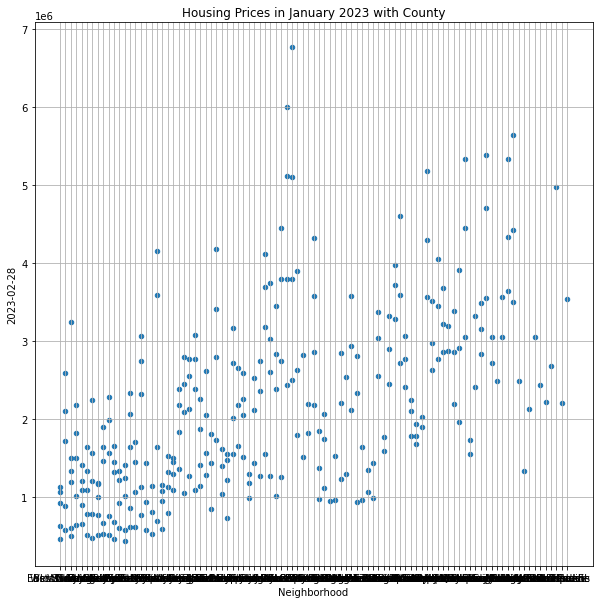

In [48]:
grouped_df1.plot(kind="scatter", x="Neighborhood", y="2023-02-28", grid=True, figsize=(10,10),
              title="Housing Prices in January 2023 with County")
plt.show()


In [4]:
#Data preparation
# Reformat data of the independent variable X as a single-column array
X = df_housingprices["City"].values.reshape(-1, 1)

# Display sample data
X[:5]

array([['Los Angeles'],
       ['Los Angeles'],
       ['San Jose'],
       ['Fresno'],
       ['San Jose']], dtype=object)

In [5]:
# The shape of X is 5740 samples, with a single feature (column)
X.shape

(5740, 1)

In [6]:
# Create an array for the dependent variable y
y = df_housingprices["2023-01-31"]

In [18]:
city_dummies = pd.get_dummies(df_housingprices["City"])
city_dummies.tail()

KeyError: 'City'

In [8]:
ccinfo_df = pd.concat([df_housingprices,city_dummies], axis=1)
# Drop the original education column
df_housingprices = df_housingprices.drop(columns=["City"])
# Display the DataFrame
df_housingprices.head()

,RegionID,Neighborhood,State,Metro,County,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,...,2022-06-30,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,BedroomCount
0,118208,South Los Angeles,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,350403.0,354217.0,357681.0,360467.0,361981.0,...,485481.0,486580.0,486336.0,486796.0,486585.0,487578.0,486809.0,489862.0,489152.0,1
1,268496,Southeast Los Angeles,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,312659.0,314476.0,315822.0,317131.0,316895.0,...,410623.0,413743.0,416449.0,419431.0,420848.0,422551.0,422515.0,427628.0,430679.0,1
2,273565,East San Jose,CA,"San Jose-Sunnyvale-Santa Clara, CA",Santa Clara County,394852.0,397467.0,399616.0,400423.0,400189.0,...,465598.0,465629.0,463605.0,460273.0,456309.0,452782.0,449427.0,451437.0,454010.0,1
3,273088,Bullard,CA,"Fresno, CA",Fresno County,99098.0,103441.0,107280.0,111859.0,115665.0,...,154223.0,156623.0,158448.0,159079.0,159166.0,158239.0,157523.0,162523.0,167592.0,1
4,276652,West San Jose,CA,"San Jose-Sunnyvale-Santa Clara, CA",Santa Clara County,488197.0,492374.0,495291.0,494556.0,490384.0,...,552316.0,550898.0,546854.0,542083.0,538433.0,536506.0,535151.0,551396.0,573673.0,1


In [9]:
#Building the Linear Regression Model
model = LinearRegression()

In [12]:
# Fit the data into the model
model.fit(city_dummies, y)

LinearRegression()

In [13]:
# Display the slope
print(f"Model's slope: {model.coef_}")

Model's slope: [  29977.77379893   31576.4404656   -19497.48377683 -444179.17858201
 -821467.91445047  834682.06167772  212886.93321922 3445551.60713227
 -122367.99286773 2192929.77379893  962846.10713227  351676.70713227
  226468.49696277 -716153.73286774 -851078.17858202 -386626.16684034
 -760955.53802902 -244247.68234142 -627748.55953441 -501945.24069382
 -500537.89286774  177221.69536756 1397214.02818489 -135269.28175663
 -325252.1477697  -456583.39286773 -350616.1620985  -530755.11508996
 -528418.65602563 -401612.01786774 -457323.04286773 -529407.19286773
  566455.40713226  255505.68777743 -867344.11508996  159453.10713226
   24979.68184491 -772099.89286774 -386156.34286774 -360342.1095344
  382322.3154656  -514209.22620107  254606.77746193 -618727.57707825
 -281558.21104955   71770.7434959   594107.10713227 -637249.78175662
 -830985.17858202 -256439.90050132 3204937.10713226   23216.03657265
 2768926.92531408 -773196.16559501 1664711.26929443  907594.73570368
   36154.10713226 -1

In [15]:
# Display the model's best fit line formula
print(f"Model's formula: y = {model.intercept_} + {model.coef_[0]}X")

Model's formula: y = 1210197.892867736 + 29977.77379893079X


In [14]:
# Display the y-intercept
print(f"Model's y-intercept: {model.intercept_}")

Model's y-intercept: 1210197.892867736


In [28]:
# Make predictions using the X set
predicted_y_values = model.predict("2023-01-31")

c:\Users\ektac\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got scalar array instead:
array=2023-01-31.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [22]:
# Create a copy of the original data
df_price_predicted = df_housingprices.copy()

# Add a column with the predicted salary values
df_price_predicted["price_predicted"] = predicted_y_values

# Display sample data
df_price_predicted.round()

,RegionID,Neighborhood,State,Metro,County,2020-01-31,2020-02-29,2020-03-31,2020-04-30,2020-05-31,...,2022-07-31,2022-08-31,2022-09-30,2022-10-31,2022-11-30,2022-12-31,2023-01-31,2023-02-28,BedroomCount,price_predicted
0,118208,South Los Angeles,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,350403.0,354217.0,357681.0,360467.0,361981.0,...,486580.0,486336.0,486796.0,486585.0,487578.0,486809.0,489862.0,489152.0,1,1233414.0
1,268496,Southeast Los Angeles,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,312659.0,314476.0,315822.0,317131.0,316895.0,...,413743.0,416449.0,419431.0,420848.0,422551.0,422515.0,427628.0,430679.0,1,1233414.0
2,273565,East San Jose,CA,"San Jose-Sunnyvale-Santa Clara, CA",Santa Clara County,394852.0,397467.0,399616.0,400423.0,400189.0,...,465629.0,463605.0,460273.0,456309.0,452782.0,449427.0,451437.0,454010.0,1,1196601.0
3,273088,Bullard,CA,"Fresno, CA",Fresno County,99098.0,103441.0,107280.0,111859.0,115665.0,...,156623.0,158448.0,159079.0,159166.0,158239.0,157523.0,162523.0,167592.0,1,342854.0
4,276652,West San Jose,CA,"San Jose-Sunnyvale-Santa Clara, CA",Santa Clara County,488197.0,492374.0,495291.0,494556.0,490384.0,...,550898.0,546854.0,542083.0,538433.0,536506.0,535151.0,551396.0,573673.0,1,1196601.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5735,416964,Palo del Amo,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,1138242.0,1138178.0,1136606.0,1136593.0,1134125.0,...,1528816.0,1525721.0,1520867.0,1520738.0,1524223.0,1526842.0,1517614.0,1500845.0,5,1153762.0
5736,816654,Wisteria Place,CA,"Sacramento-Roseville-Folsom, CA",Sacramento County,707131.0,710201.0,713802.0,716662.0,717695.0,...,856203.0,850268.0,841650.0,834761.0,830254.0,826125.0,821199.0,818076.0,5,681779.0
5737,268594,Wildhorse,CA,"Sacramento-Roseville-Folsom, CA",Yolo County,986360.0,987999.0,991627.0,995864.0,996184.0,...,1180328.0,1181081.0,1178730.0,1177077.0,1176723.0,1174847.0,1163805.0,1153217.0,5,884946.0
5738,810981,Suburbia Park,CA,"Los Angeles-Long Beach-Anaheim, CA",Orange County,1087736.0,1086501.0,1086728.0,1088662.0,1089963.0,...,1401822.0,1403423.0,1403561.0,1407924.0,1413183.0,1415136.0,1403629.0,1391961.0,5,1592520.0


In [62]:
# Create a line plot of the predicted salary values
#best_fit_line = df_price_predicted.hvplot.line(
    #x = "city_dummies",
   # y = "2023-02-28",
    #color = "red"
#)
#best_fit_line

DataError: Supplied data does not contain specified dimensions, the following dimensions were not found: ['city_dummies']

PandasInterface expects tabular data, for more information on supported datatypes see http://holoviews.org/user_guide/Tabular_Datasets.html